In [1]:
!pip install langgraph typing

In [44]:
from langgraph.graph import StateGraph, START, END
from typing import Dict, TypedDict, List

In [45]:
def return_std_dev_neuminator(list_nums, average):
  numerator = 0
  for num in list_nums:
    numerator += (num - average)**2
  return numerator


In [65]:
class AgentState1(TypedDict):
  number1: int
  number2: int
  operaton0: str
  operaton1: str
  operaton2: str
  answer1 : int
  answer2 : int
  answer3: int
  message: str

def addition_node(state:AgentState1) -> AgentState1:
  state["answer1"] = state["number1"] + state["number2"]
  state["message"] = f"Hi {state['message']} Addition: {state['answer1']}"
  return state

def subtraction_node(state:AgentState1) -> AgentState1:
  state["answer2"] = state["number1"] - state["number2"]
  state["message"] = f"Hi {state['message']} Subtraction: {state['answer2']}"
  return state

def multiple_node(state:AgentState1) -> AgentState1:
  state["answer1"] = state["number1"] * state["number2"]
  state["message"] = f"Hi {state['message']} Multiplication: {state['answer1']}"
  return state

def division_node(state:AgentState1) -> AgentState1:
  state["answer2"] = state["number1"] / state["number2"]
  state["message"] = f"Hi {state['message']} Division: {state['answer2']}"
  return state

def avg_node(state:AgentState1) -> AgentState1:
  state["answer3"] = (state["number1"] + state["number2"])/2
  state["message"] = f"Hi {state['message']} Average {state['answer3']}"
  return state
def std_deviation_node(state:AgentState1) -> AgentState1:
  average = (state["number1"] + state["number2"]) /2
  # std deviation
  neuminator_val = return_std_dev_neuminator([state["number1"], state["number2"]], average)
  state["answer4"] = (neuminator_val/2)**0.5
  state["message"] = f"Hi {state['message']} Standard Deviation: {state['answer4']}"
  return state



def decision_node_1(state:AgentState1) -> AgentState1:
  if state["operaton0"] == "+":
    return 'addition_operation'
  elif state["operaton0"] == "-":
    return 'subtraction_operation'

def decision_node_2(state:AgentState1) -> AgentState1:
  if state["operaton1"] == "*":
    return 'multiplication_operation'
  elif state["operaton1"] == "/":
    return 'division_operation'

def decision_node_3(state:AgentState1) -> AgentState1:
  if state["operaton2"] == "avg":
    return 'average'
  elif state["operaton2"] == "std_dev":
    return 'standard_deviation'


In [66]:
graph = StateGraph(AgentState1)

# Add operation nodes
graph.add_node("add_node", addition_node)
graph.add_node("sub_node", subtraction_node)
graph.add_node("mul_node", multiple_node)
graph.add_node("div_node", division_node)

# Add decision nodes
graph.add_node("decision_node_1", lambda state: state)
graph.add_node("decision_node_2", lambda state: state)
graph.add_node("decision_node_3", lambda state: state)
graph.add_node("decision_node_4", lambda state: state)

# add third step edges
graph.add_node("avg_node", avg_node)
graph.add_node("std_dev_node",std_deviation_node )

graph.add_edge(START, "decision_node_1")

# Conditional edges from decision_node_1
graph.add_conditional_edges(
    "decision_node_1",
    decision_node_1,  # Your first decision function
    {
        "addition_operation": "add_node",
        "subtraction_operation": "sub_node"
    }
)

# After add or sub, route to decision_node_2
graph.add_edge("add_node", "decision_node_2")
graph.add_edge("sub_node", "decision_node_2")

# Conditional edges from decision_node_2
graph.add_conditional_edges(
    "decision_node_2",
    decision_node_2,  # Your second decision function
    {
        "multiplication_operation": "mul_node",
        "division_operation": "div_node"
    }
)

graph.add_edge("mul_node", "decision_node_3")
graph.add_edge("div_node", "decision_node_3")

graph.add_conditional_edges(
    "decision_node_3",
    decision_node_3,
    {
        "average": "avg_node",
        "standard_deviation": "std_dev_node",

    }
)
graph.add_edge("avg_node",END)
graph.add_edge("std_dev_node", END)


# Compile the graph
app = graph.compile()


In [5]:
!pip install Ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.1 MB/s eta 0:00:00


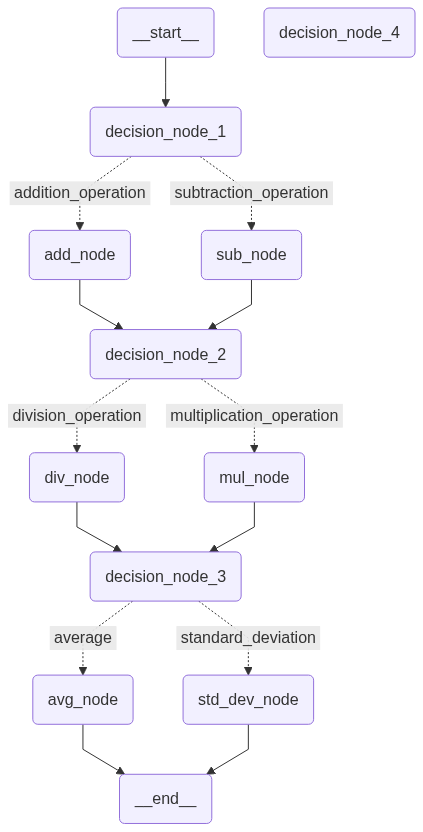

In [37]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [67]:
result = app.invoke({
    "message": "saad",
    "number1": 1,
    "number2": 3,
    "operaton0": "+",
    "operaton1": "*",
    "operaton2": "std_dev"
    })


In [68]:
result['message']

'Hi Hi Hi saad Addition: 4 Multiplication: 3 Standard Deviation: 1.0'